### Load logs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
# Mapping from .npz NumPy structure to our metric 
logs_map = {
    "training_loss": 'arr_0',
    "training_accuracy": 'arr_1',
    "validation_loss": 'arr_2',
    "validation_accuracy": 'arr_3',
    "test_loss": 'arr_4',
    "test_accuracy": 'arr_5'
}
# All model versions done. All models are relative to the base model
# e.g. Drop1< means Dropout For Layer 1 of the current mode is less than
# the Dropout of the base model for the same layer
name_map =  {
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=50.": 
    "Base Model - 512:256:128 - LeakyReLU - Adam - LR=0.005 - Drop=0.25:0.3:0.35",

    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=100.": 
    "Base (100ep)",

    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.3:0.4_batch=50000_epochs=50.": 
    "Drop1< + Drop3> + LR*2",
    
    "NN_1024_512_256_LeakyReLU_Adam_LR=0.0005_Dropout=0.2_0.35_0.45_L2=0.0001_batch=50000_epochs=50.":
    "LayerSizes*2 + Drop1< + Drop2&3> + L2 + LR*2",
    
    "NN_1024_512_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45-0.5_L2=0.0001_batch=50000_epochs=50.":
    "4 Layers + Lay1*2 + AllDrop>",

    "NN_2048_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45_L2=0.0001_batch=50000_epochs=50.":
    "LayerSize1*4",

    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3_batch=20000_epochs=50.": 
    "AllDrop< + LayerSizes/2 + LR*2",
    
    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.3:0.3:0.4_batch=30000_epochs=50.": 
    "LayerSizes/2 + Drop1&3> + (30k batch) + LR*2",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.": 
    "Drop2&3> + L2",
    
    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3.": 
    "LayerSize/2 + LR*2 + AllDrop<",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L2=0.0001_batch=50000_epochs=50_LRDecay.": 
    "Best Model (LR Decay)",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L2=0.001_batch=30000_epochs=50.": 
    "L2 Only",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L1=2e-05_L2=0_batch=30000_epochs=50.": 
    "L1 Only",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L1=2e-05_L2=0.0001_batch=30000_epochs=50.": 
    "L1 & L2",

    "NN_512:256:128_LeakyReLU_None_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "Vanilla GD",

    "NN_512:256:128_LeakyReLU_RMS_Prop_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "RMS Prop",
    
    "NN_256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "2 Layer Network",

    "NN_512:256:128_64_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_0.5_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "4 Layer Network",

    "NN_512:256:128_Sigmoid_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "Sigmoid",
    
    "NN_512:256:128_ReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "ReLU",   
}
log_files = glob.glob("../nn-logs/*.npz")
experiments = {}
for file in log_files:
    filename = file.split("/")[-1].replace("npz", "")
    clean_name = name_map.get(filename, filename)
    experiments[clean_name] = np.load(file)
    if filename not in name_map:
        print(filename)


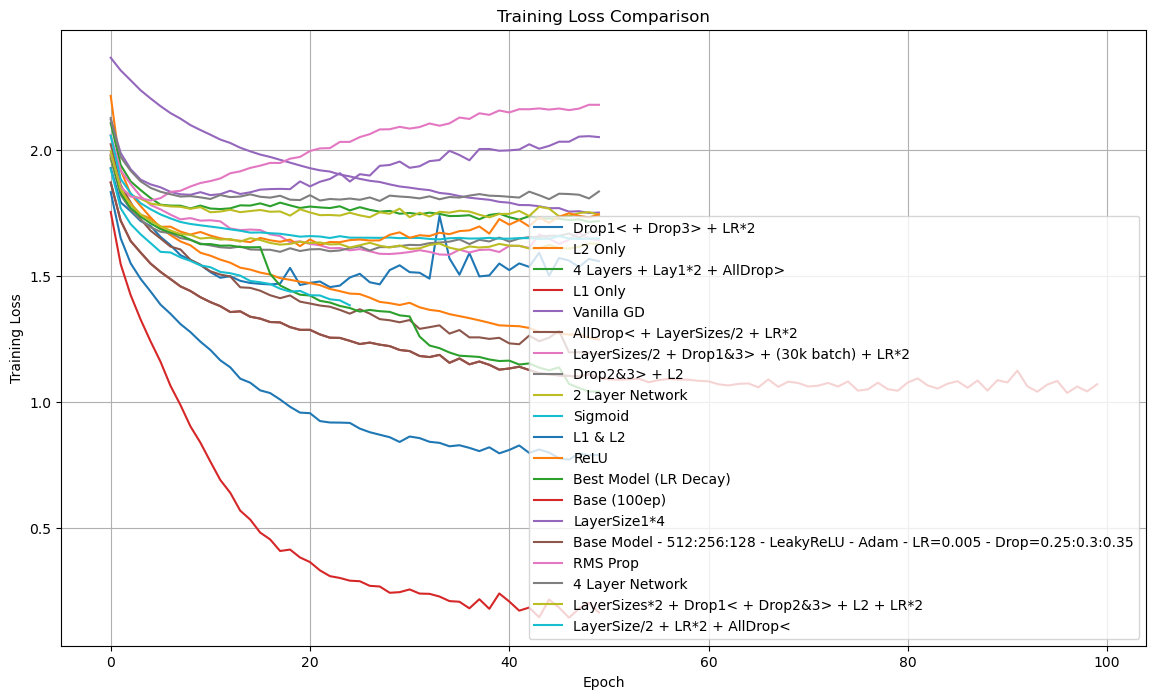

In [8]:
plt.figure(figsize=(14,8))

for name, logs in experiments.items():
    train_loss = logs[logs_map["training_loss"]]
    plt.plot(train_loss, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

#### Comparing Activation Functions (Sigmoid vs ReLU vs LeakyReLU)

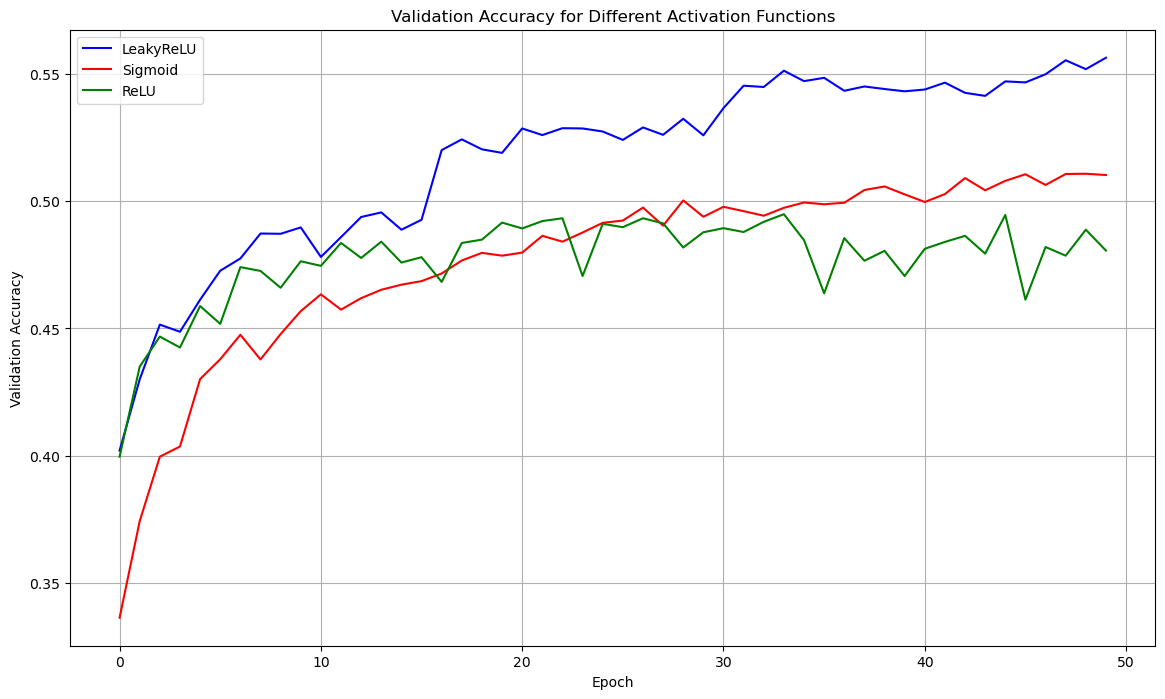

In [9]:
activation_func_comp_models = ["Best Model (LR Decay)", "Sigmoid", "ReLU"]
colours = ["Blue", "Red", "Green"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(activation_func_comp_models):
    logs = experiments[name]
    validation_accuracy = logs[logs_map["validation_accuracy"]]
    if name == "Best Model (LR Decay)":
        name = "LeakyReLU"
    plt.plot(validation_accuracy, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy for Different Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

#### Comparison of different optimisers (Vanilla Gradient Descent, RMS Prop, Adam)

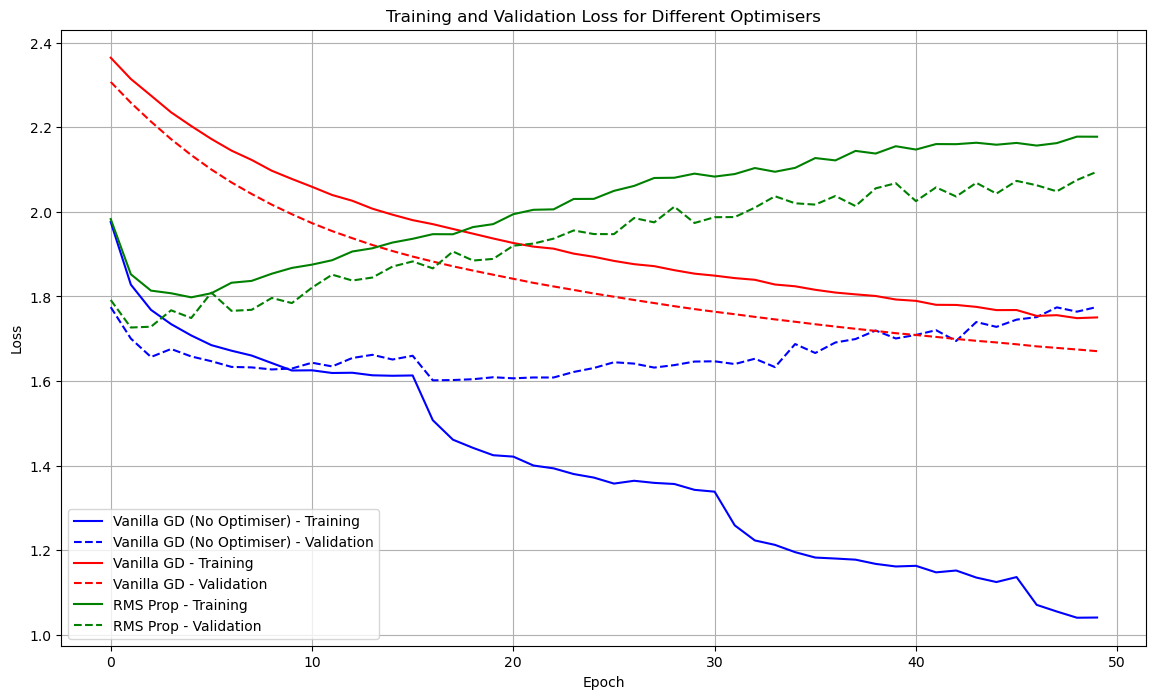

In [10]:
optimiser_comp_models = ["Best Model (LR Decay)", "Vanilla GD", "RMS Prop"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(optimiser_comp_models):
    logs = experiments[name]
    training_loss = logs[logs_map["training_loss"]]
    validation_loss = logs[logs_map["validation_loss"]]
    if name == "Best Model (LR Decay)":
        name = "Vanilla GD (No Optimiser)"
    plt.plot(training_loss, label=f"{name} - Training", color=colours[c])
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Different Optimisers")
plt.legend()
plt.grid(True)
plt.show()

#### Comparison of Regularisers (L1, L2, Dropout)

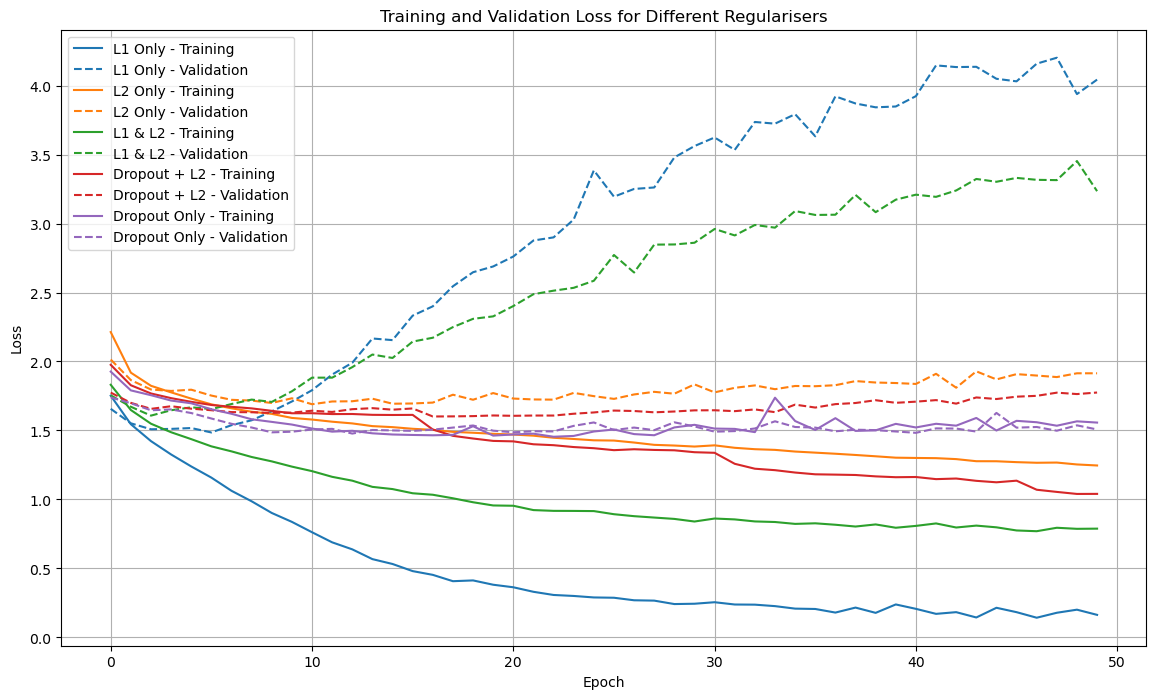

In [11]:
# Training Loss and Validation Loss
regularisers_models = ["L1 Only", "L2 Only", "L1 & L2", "Best Model (LR Decay)", "Drop1< + Drop3> + LR*2"]
plt.figure(figsize=(14, 8))
for name in regularisers_models:
    logs = experiments[name]
    training_loss = logs[logs_map["training_loss"]]
    validation_loss = logs[logs_map["validation_loss"]]
    if name == "Best Model (LR Decay)":
        name = "Dropout + L2"
    elif name == "Drop1< + Drop3> + LR*2":
        name = "Dropout Only"
    line = plt.plot(training_loss, label=f"{name} - Training")
    line = line[0]
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=line.get_color())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Different Regularisers")
plt.legend()
plt.grid(True)
plt.show()

#### Comparing Network Architecture - Shallow Network or Deeper Network?

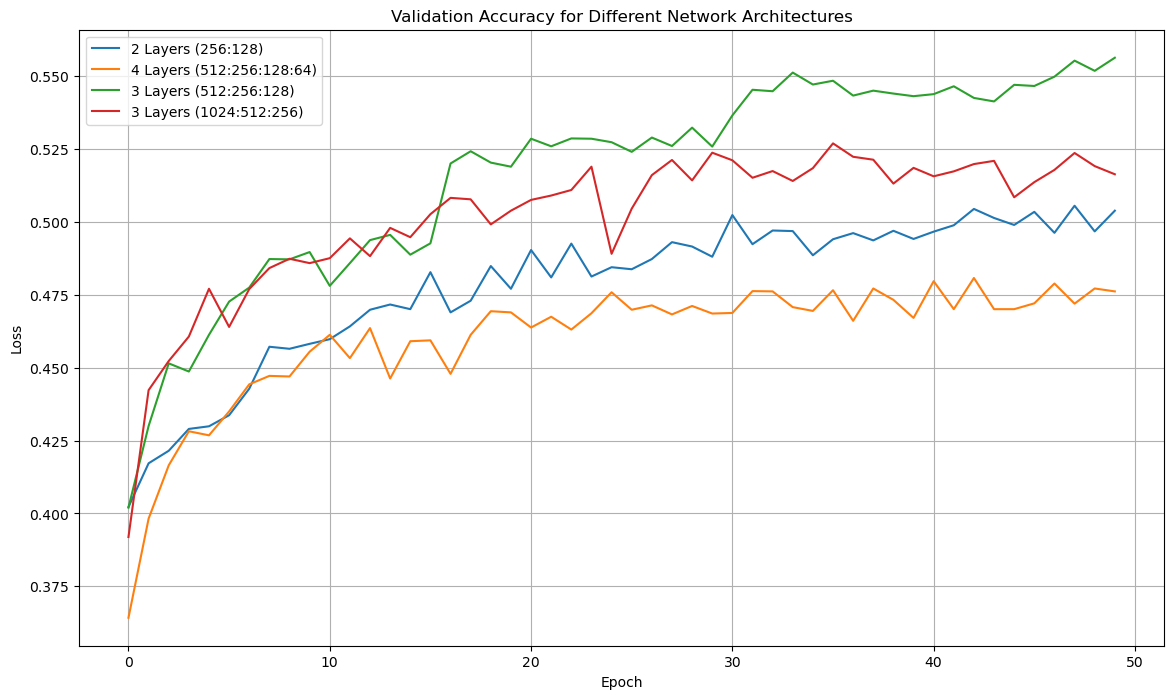

In [12]:
networkarch_comparison_models = {
    "2 Layer Network": "2 Layers (256:128)",
    "4 Layer Network": "4 Layers (512:256:128:64)",
    "Best Model (LR Decay)": "3 Layers (512:256:128)", 
    "LayerSizes*2 + Drop1< + Drop2&3> + L2 + LR*2": "3 Layers (1024:512:256)",
}
plt.figure(figsize=(14, 8))
for name in networkarch_comparison_models:
    logs = experiments[name]
    validation_accuracy = logs[logs_map["validation_accuracy"]]
    plt.plot(validation_accuracy, label=networkarch_comparison_models[name])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Accuracy for Different Network Architectures")
plt.legend()
plt.grid(True)
plt.show()

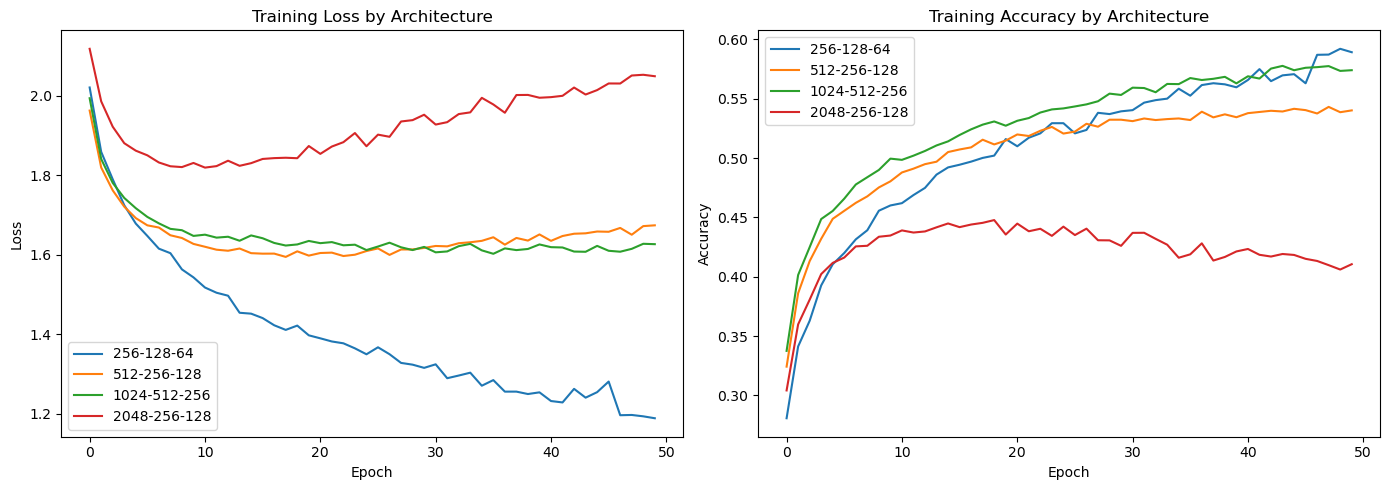

small test acc: 47.05%
medium test acc: 49.85%
large test acc: 51.88%
xlarge test acc: 44.89%


In [13]:
# architecture comparison
small = np.load('../nn-logs/NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3_batch=20000_epochs=50.npz')
medium = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.npz')
large = np.load('../nn-logs/NN_1024_512_256_LeakyReLU_Adam_LR=0.0005_Dropout=0.2_0.35_0.45_L2=0.0001_batch=50000_epochs=50.npz')
xlarge = np.load('../nn-logs/NN_2048_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45_L2=0.0001_batch=50000_epochs=50.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(small['arr_0'], label='256-128-64')
ax1.plot(medium['arr_0'], label='512-256-128')
ax1.plot(large['arr_0'], label='1024-512-256')
ax1.plot(xlarge['arr_0'], label='2048-256-128')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Architecture')
ax1.legend()

ax2.plot(small['arr_1'], label='256-128-64')
ax2.plot(medium['arr_1'], label='512-256-128')
ax2.plot(large['arr_1'], label='1024-512-256')
ax2.plot(xlarge['arr_1'], label='2048-256-128')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy by Architecture')
ax2.legend()

plt.tight_layout()
#plt.savefig('architecture_comparison.png')
plt.show()

print(f"small test acc: {small['arr_5']:.2%}")
print(f"medium test acc: {medium['arr_5']:.2%}")
print(f"large test acc: {large['arr_5']:.2%}")
print(f"xlarge test acc: {xlarge['arr_5']:.2%}")

In [14]:
print(f"First loss: {small['arr_0'][0]}, Last loss: {small['arr_0'][-1]}")
print(f"First acc: {small['arr_1'][0]}, Last acc: {small['arr_1'][-1]}")

First loss: 2.0213222326198403, Last loss: 1.1880676842103512
First acc: 0.2808125, Last acc: 0.58925


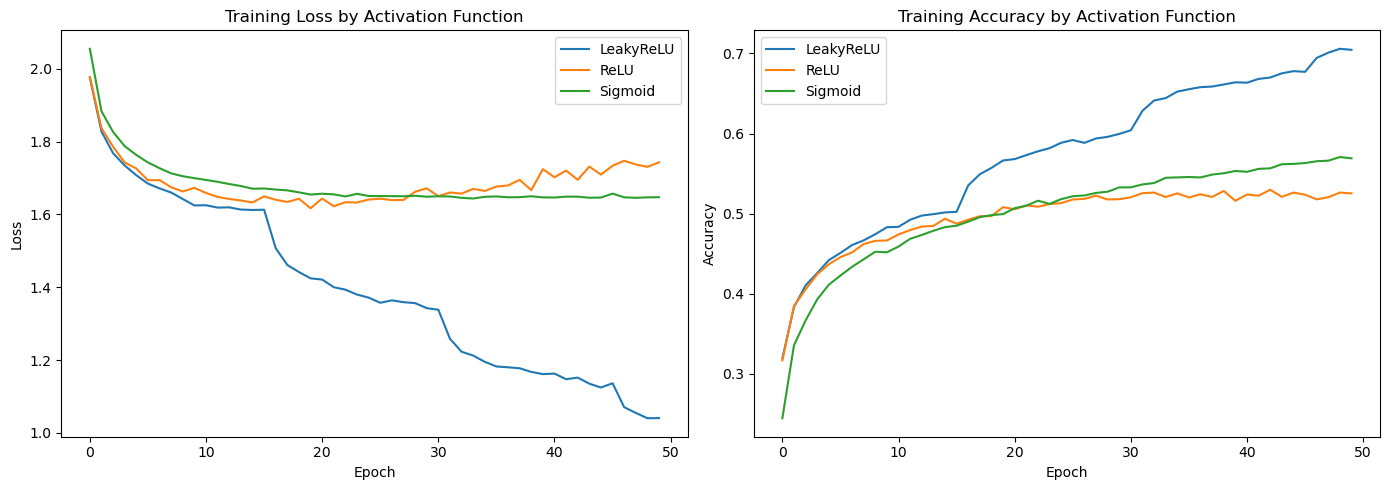

LeakyReLU test acc: 54.59%
ReLU test acc: 48.52%
Sigmoid test acc: 51.58%


In [15]:
# activation comparison
leaky = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L2=0.0001_batch=50000_epochs=50_LRDecay.npz')
relu = np.load('../nn-logs/NN_512:256:128_ReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz')
sigmoid = np.load('../nn-logs/NN_512:256:128_Sigmoid_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(leaky['arr_0'], label='LeakyReLU')
ax1.plot(relu['arr_0'], label='ReLU')
ax1.plot(sigmoid['arr_0'], label='Sigmoid')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Activation Function')
ax1.legend()

ax2.plot(leaky['arr_1'], label='LeakyReLU')
ax2.plot(relu['arr_1'], label='ReLU')
ax2.plot(sigmoid['arr_1'], label='Sigmoid')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy by Activation Function')
ax2.legend()

plt.tight_layout()
#plt.savefig('activation_comparison.png')
plt.show()

print(f"LeakyReLU test acc: {leaky['arr_5']:.2%}")
print(f"ReLU test acc: {relu['arr_5']:.2%}")
print(f"Sigmoid test acc: {sigmoid['arr_5']:.2%}")

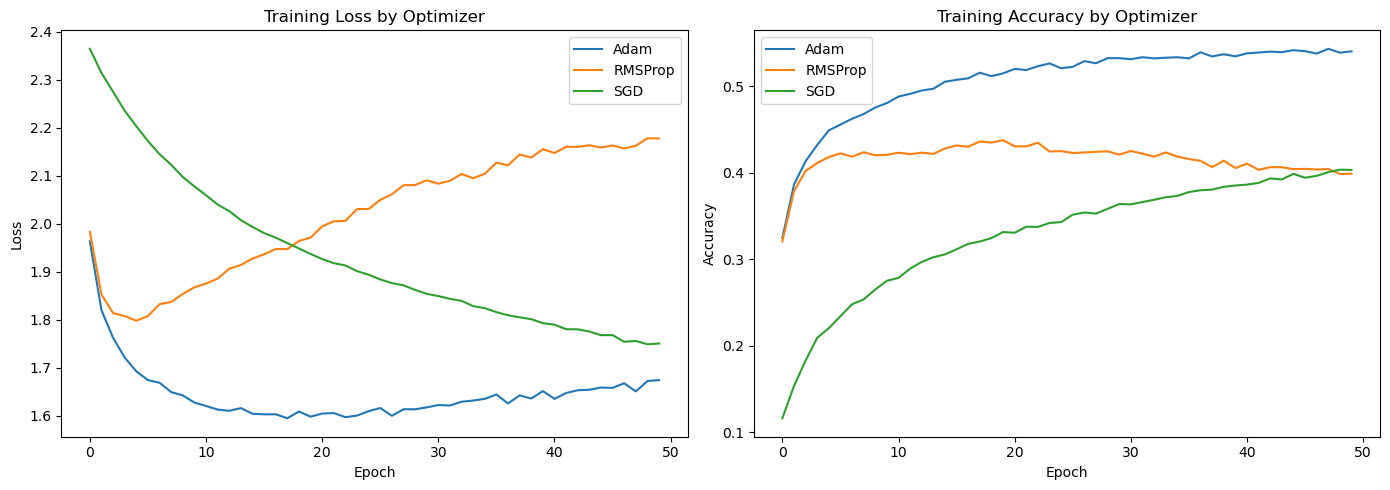

Adam test acc: 49.85%
RMSProp test acc: 42.75%
SGD test acc: 45.08%


In [16]:
# optimizer comparison
adam = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.npz')
rmsprop = np.load('../nn-logs/NN_512:256:128_LeakyReLU_RMS_Prop_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz')
none_opt = np.load('../nn-logs/NN_512:256:128_LeakyReLU_None_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(adam['arr_0'], label='Adam')
ax1.plot(rmsprop['arr_0'], label='RMSProp')
ax1.plot(none_opt['arr_0'], label='SGD')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Optimizer')
ax1.legend()

ax2.plot(adam['arr_1'], label='Adam')
ax2.plot(rmsprop['arr_1'], label='RMSProp')
ax2.plot(none_opt['arr_1'], label='SGD')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy by Optimizer')
ax2.legend()

plt.tight_layout()
#plt.savefig('optimizer_comparison.png')
plt.show()

print(f"Adam test acc: {adam['arr_5']:.2%}")
print(f"RMSProp test acc: {rmsprop['arr_5']:.2%}")
print(f"SGD test acc: {none_opt['arr_5']:.2%}")

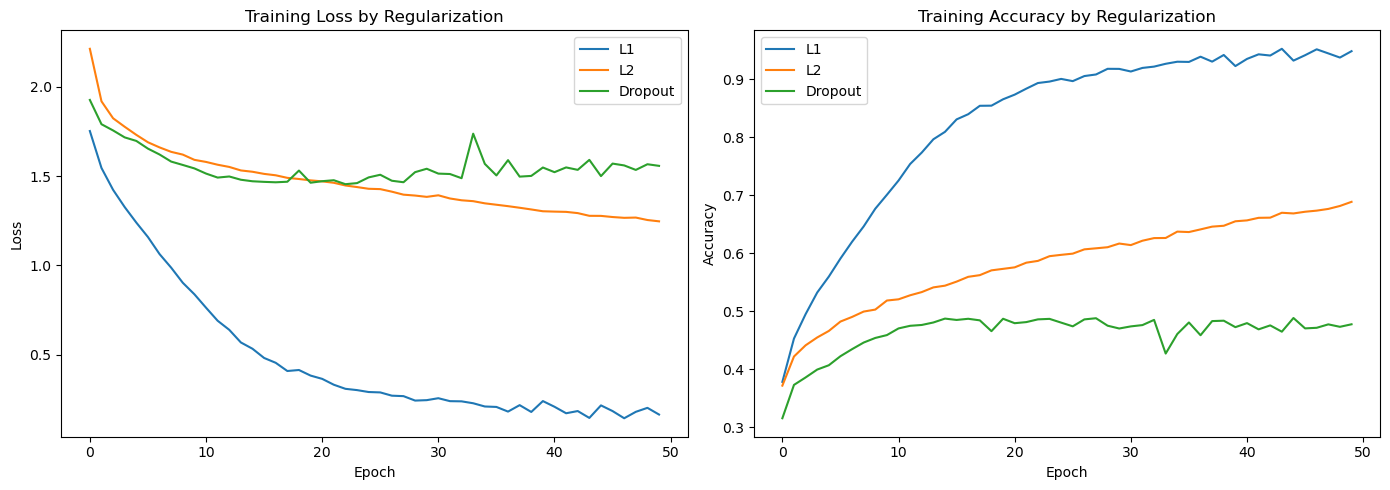

L1 test acc: 48.86%
L2 test acc: 50.12%
Dropout test acc: 50.13%


In [17]:
# regularization comparison
l1 = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L1=2e-05_L2=0_batch=30000_epochs=50.npz')
l2 = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L2=0.001_batch=30000_epochs=50.npz')
dropout = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.3:0.4_batch=50000_epochs=50.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(l1['arr_0'], label='L1')
ax1.plot(l2['arr_0'], label='L2')
ax1.plot(dropout['arr_0'], label='Dropout')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Regularization')
ax1.legend()

ax2.plot(l1['arr_1'], label='L1')
ax2.plot(l2['arr_1'], label='L2')
ax2.plot(dropout['arr_1'], label='Dropout')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy by Regularization')
ax2.legend()

plt.tight_layout()
#plt.savefig('regularization_comparison.png')
plt.show()

print(f"L1 test acc: {l1['arr_5']:.2%}")
print(f"L2 test acc: {l2['arr_5']:.2%}")
print(f"Dropout test acc: {dropout['arr_5']:.2%}")

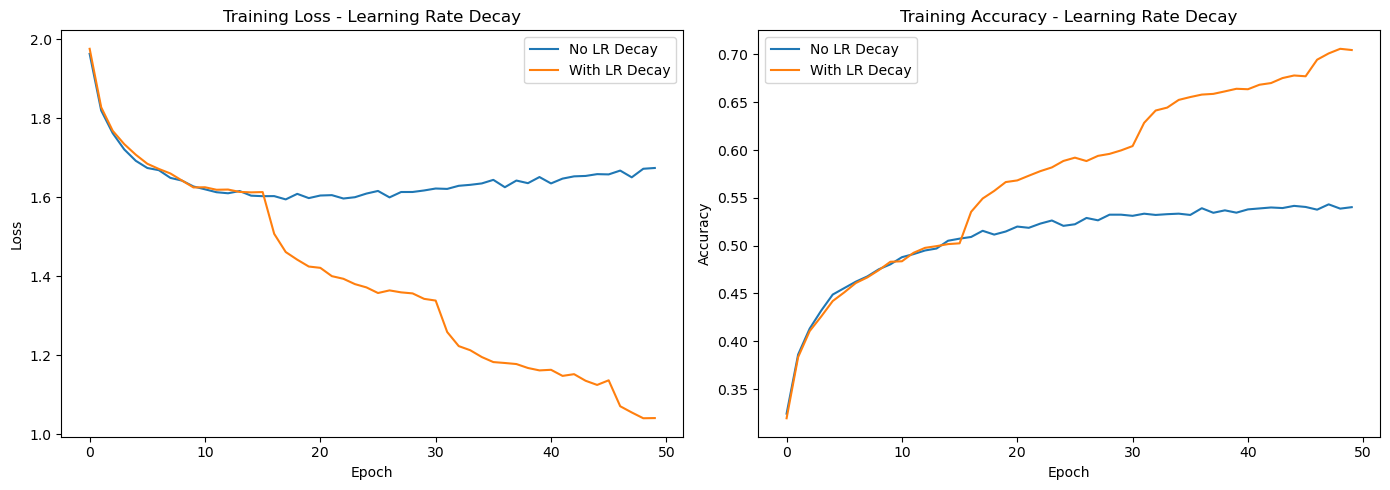

No LR Decay test acc: 49.85%
With LR Decay test acc: 54.59%


In [18]:
# learning rate decay comparison
no_decay = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.npz')
with_decay = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L2=0.0001_batch=50000_epochs=50_LRDecay.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(no_decay['arr_0'], label='No LR Decay')
ax1.plot(with_decay['arr_0'], label='With LR Decay')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss - Learning Rate Decay')
ax1.legend()

ax2.plot(no_decay['arr_1'], label='No LR Decay')
ax2.plot(with_decay['arr_1'], label='With LR Decay')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy - Learning Rate Decay')
ax2.legend()

plt.tight_layout()
#plt.savefig('lr_decay_comparison.png')
plt.show()

print(f"No LR Decay test acc: {no_decay['arr_5']:.2%}")
print(f"With LR Decay test acc: {with_decay['arr_5']:.2%}")

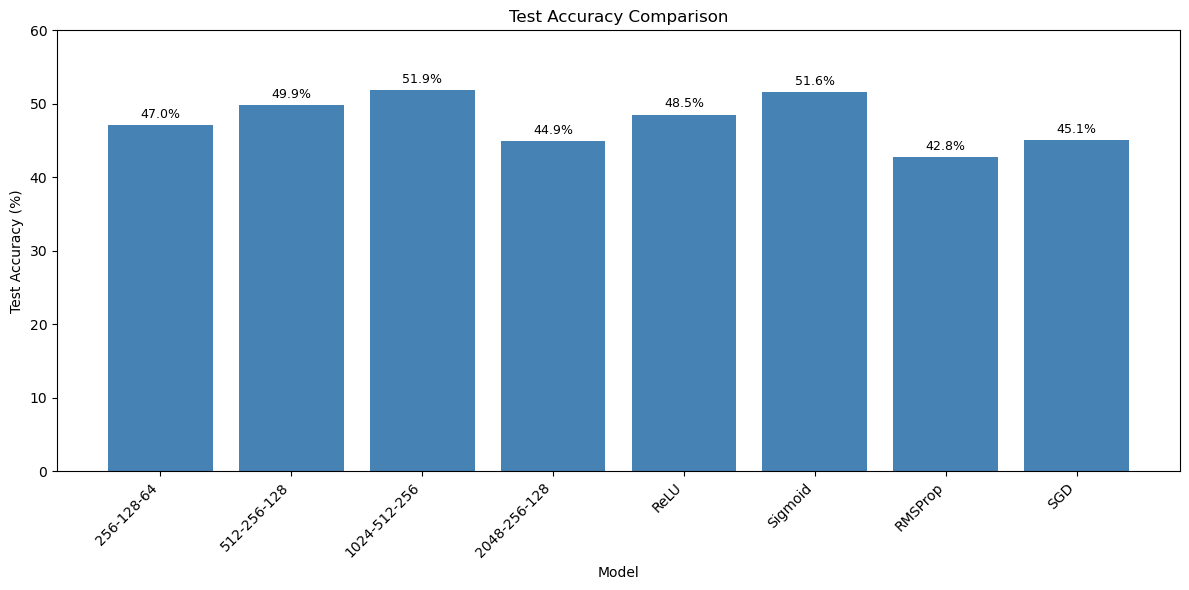

In [19]:
# test accuracy bar chart
models = {
    '256-128-64': np.load('../nn-logs/NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3_batch=20000_epochs=50.npz'),
    '512-256-128': np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.npz'),
    '1024-512-256': np.load('../nn-logs/NN_1024_512_256_LeakyReLU_Adam_LR=0.0005_Dropout=0.2_0.35_0.45_L2=0.0001_batch=50000_epochs=50.npz'),
    '2048-256-128': np.load('../nn-logs/NN_2048_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45_L2=0.0001_batch=50000_epochs=50.npz'),
    'ReLU': np.load('../nn-logs/NN_512:256:128_ReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz'),
    'Sigmoid': np.load('../nn-logs/NN_512:256:128_Sigmoid_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz'),
    'RMSProp': np.load('../nn-logs/NN_512:256:128_LeakyReLU_RMS_Prop_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz'),
    'SGD': np.load('../nn-logs/NN_512:256:128_LeakyReLU_None_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.npz'),
}

names = list(models.keys())
accuracies = [models[name]['arr_5'] * 100 for name in names]

plt.figure(figsize=(12, 6))
bars = plt.bar(names, accuracies, color='steelblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 60)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{acc:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
#plt.savefig('test_accuracy_comparison.png')
plt.show()

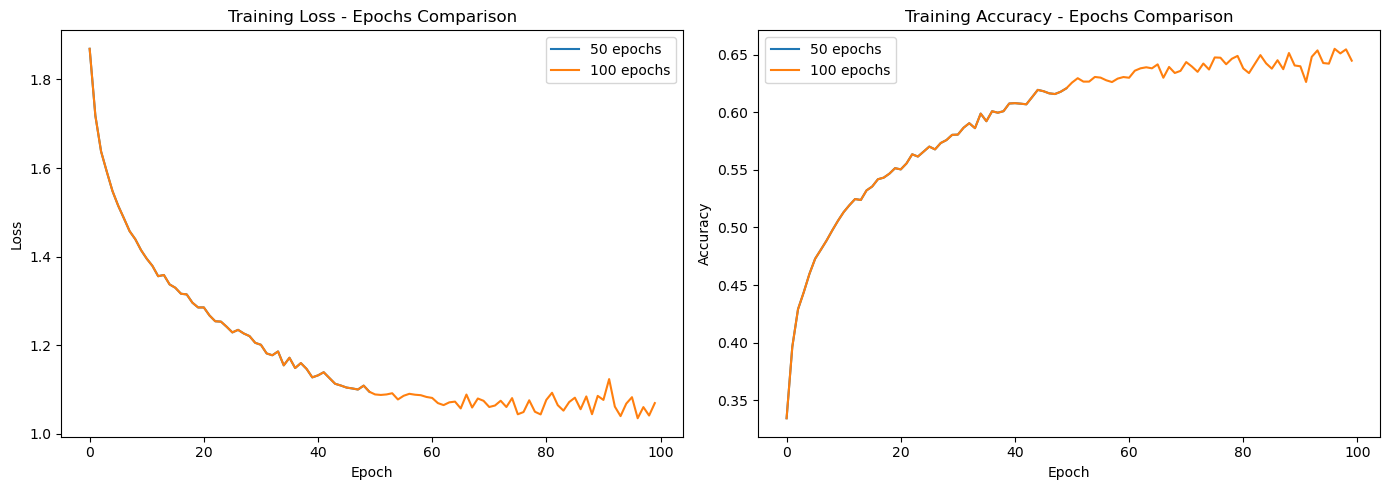

50 epochs test acc: 52.13%
100 epochs test acc: 52.43%


In [20]:
# epochs comparison
epochs_50 = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=50.npz')
epochs_100 = np.load('../nn-logs/NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=100.npz')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(epochs_50['arr_0'], label='50 epochs')
ax1.plot(epochs_100['arr_0'], label='100 epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss - Epochs Comparison')
ax1.legend()

ax2.plot(epochs_50['arr_1'], label='50 epochs')
ax2.plot(epochs_100['arr_1'], label='100 epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy - Epochs Comparison')
ax2.legend()

plt.tight_layout()
#plt.savefig('epochs_comparison.png')
plt.show()

print(f"50 epochs test acc: {epochs_50['arr_5']:.2%}")
print(f"100 epochs test acc: {epochs_100['arr_5']:.2%}")